In [1]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# print the first 5 rows of the dataframe
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# data shpae
df.shape

(284807, 31)

In [8]:
# Lets see the column name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Summary Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(df))

[[ 0.00000000e+00 -9.08530061e-03 -4.86273988e-04 ... -1.40662094e-04
   9.99658439e-01  0.00000000e+00]
 [ 0.00000000e+00  3.14200001e-01  7.01632379e-02 ...  3.88161797e-03
   7.09143734e-01  0.00000000e+00]
 [ 2.64054194e-03 -3.58679087e-03 -3.53875680e-03 ... -1.57777241e-04
   9.99867610e-01  0.00000000e+00]
 ...
 [ 9.99999922e-01  1.11093644e-05 -1.74348810e-06 ... -1.53719162e-07
   3.92851325e-04  0.00000000e+00]
 [ 9.99999998e-01 -1.39153210e-06  3.07013515e-06 ...  6.04977321e-07
   5.78743893e-05  0.00000000e+00]
 [ 9.99999211e-01 -3.08701850e-06 -1.09804382e-06 ...  7.89903674e-08
   1.25584419e-03  0.00000000e+00]]


In [11]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [13]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legit_sample = legit.sample(n=492)
# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,0.868559,-0.641506,-0.111316,0.361485,0.171945,0.782167,-1.355871,-0.216935,1.271765,-1.240622,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00,0
170082,120006.0,-0.176371,0.819777,0.069842,-0.264519,0.918201,-0.982876,1.067685,-0.364310,-0.226817,-0.626946,1.375394,0.001351,-0.760079,-0.844025,0.255608,0.112932,0.330845,1.152595,0.094459,-0.074084,0.255344,0.932879,-0.426478,-0.061860,0.141894,-0.096848,-0.213543,-0.195578,22.01,0
171937,120884.0,2.106827,0.259011,-2.119258,0.274436,0.822355,-0.802714,0.350256,-0.390433,0.434324,-0.526599,-0.981673,0.532400,1.671142,-1.081146,0.859002,0.380701,-0.013227,0.571237,-0.122135,-0.065720,0.154883,0.689838,-0.168755,-1.085592,0.425521,-0.039236,0.007591,-0.037611,12.00,0
172886,121283.0,2.329722,-1.570932,-1.509515,-1.909351,-0.737463,0.259775,-1.340297,0.156880,-1.073514,1.807359,-0.603298,-1.734531,-1.900614,0.217314,-0.492850,-0.053030,0.069721,0.918625,0.502465,-0.533206,-0.212671,-0.261913,0.160934,-0.441489,-0.137929,-0.137201,-0.013784,-0.070664,15.00,0
263760,161101.0,-2.830339,-3.502549,-0.090375,-1.601039,-2.671152,1.683552,4.088482,-0.327915,-1.436561,-1.574756,-1.803165,-0.797001,1.276626,-0.772228,-0.946964,1.521522,-0.294800,-1.149475,0.398134,2.827128,0.468452,-0.895620,2.516773,-1.219609,1.058221,-0.506119,-0.403065,0.138163,1192.06,0


In [19]:
# Getting the distribution of the classes for the subsample dataset
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [21]:
new_df.shape

(984, 31)

In [22]:
# Splitting the data into Features & Targets
X = new_df.drop(columns='Class', axis=1)
y = new_df['Class']

In [23]:
# Splitting the data into Training data & Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
# Call the Model
model = RandomForestClassifier(random_state=42)

In [26]:
# import pipeline
from sklearn.pipeline import Pipeline


# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])
    
# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()
    
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
    
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline
    
# save the best model
import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9377166814480369
Test Accuracy: 0.9289340101522843
Recall Score:  0.8673469387755102
Precision Score:  0.9883720930232558
F1 Score:  0.9239130434782609


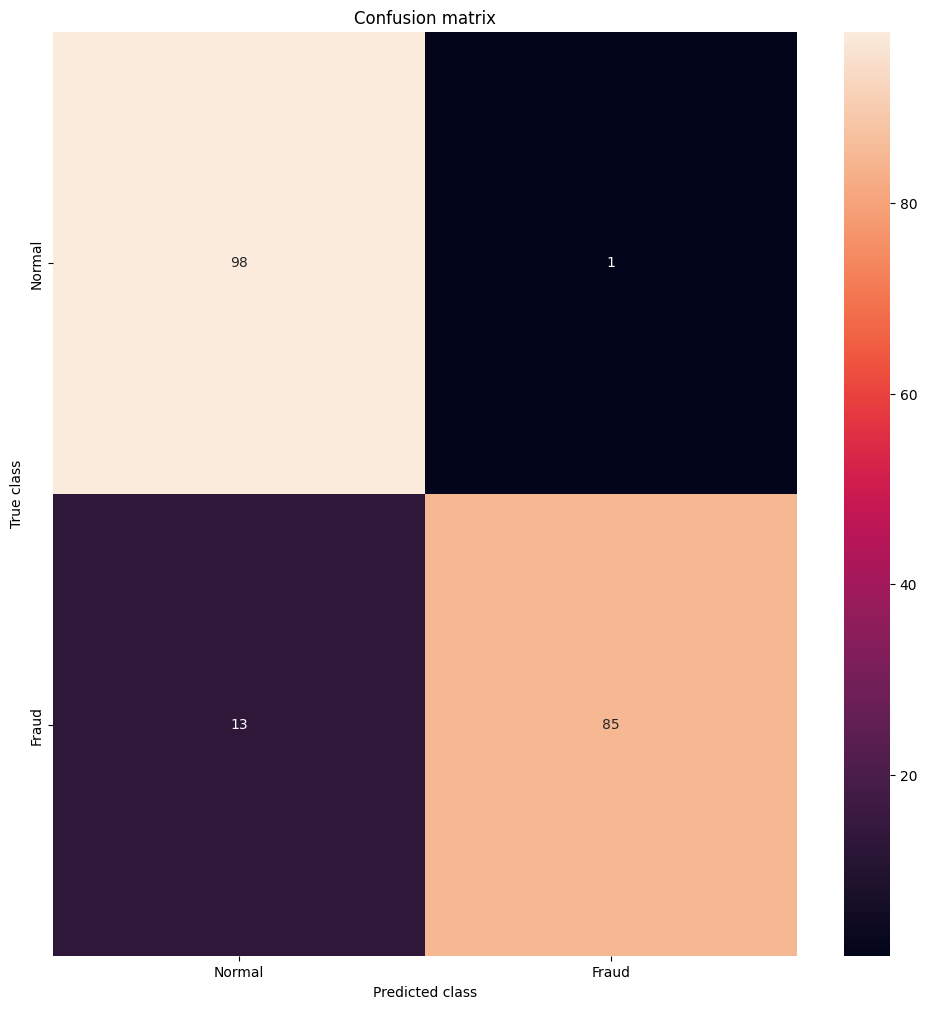

In [27]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [28]:
df_train = new_df.copy()
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27,23.0,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,-1.071425,0.868559,-0.641506,-0.111316,0.361485,0.171945,0.782167,-1.355871,-0.216935,1.271765,-1.240622,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00,0
170082,120006.0,-0.176371,0.819777,0.069842,-0.264519,0.918201,-0.982876,1.067685,-0.364310,-0.226817,-0.626946,1.375394,0.001351,-0.760079,-0.844025,0.255608,0.112932,0.330845,1.152595,0.094459,-0.074084,0.255344,0.932879,-0.426478,-0.061860,0.141894,-0.096848,-0.213543,-0.195578,22.01,0
171937,120884.0,2.106827,0.259011,-2.119258,0.274436,0.822355,-0.802714,0.350256,-0.390433,0.434324,-0.526599,-0.981673,0.532400,1.671142,-1.081146,0.859002,0.380701,-0.013227,0.571237,-0.122135,-0.065720,0.154883,0.689838,-0.168755,-1.085592,0.425521,-0.039236,0.007591,-0.037611,12.00,0
172886,121283.0,2.329722,-1.570932,-1.509515,-1.909351,-0.737463,0.259775,-1.340297,0.156880,-1.073514,1.807359,-0.603298,-1.734531,-1.900614,0.217314,-0.492850,-0.053030,0.069721,0.918625,0.502465,-0.533206,-0.212671,-0.261913,0.160934,-0.441489,-0.137929,-0.137201,-0.013784,-0.070664,15.00,0
263760,161101.0,-2.830339,-3.502549,-0.090375,-1.601039,-2.671152,1.683552,4.088482,-0.327915,-1.436561,-1.574756,-1.803165,-0.797001,1.276626,-0.772228,-0.946964,1.521522,-0.294800,-1.149475,0.398134,2.827128,0.468452,-0.895620,2.516773,-1.219609,1.058221,-0.506119,-0.403065,0.138163,1192.06,0


In [29]:
#The function display_feature_importance takes a machine learning model (model) as input and performs feature importance analysis.
def display_feature_importance(model,percentage ,top_n=34, plot=False):
    # X and y 
    X = df_train.drop('Class',axis=1)
    y = df_train['Class']
    
    #The model is fitted using the features (X) and the target variable (y), and then the feature importances are calculated.
    model.fit(X, y)
    
    # Get feature importance
    feature_importance = model.feature_importances_
    feature_names = X.columns
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    
    # Sort features by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # A threshold is calculated based on a specified percentage of the top feature importance.
    #  Features with importance above this threshold are selected.
    threshold = percentage / 100 * feature_importance_df.iloc[0]['Importance']
    
    # Select features that meet the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()
    
    #Print Selected Feature 
    print("Selected Features by {} \n \n at threshold {}%; {}".format(model , percentage,selected_features))
    
    if plot==True:
        # Set seaborn color palette to "viridis"
        sns.set(style="whitegrid", palette="viridis")
    
        # Display or plot the top features
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
        plt.title('Feature Importance for {}'.format(type(model).__name__))
        plt.show()
        
    # Add 'Exited' to the list of selected features
    selected_features.append('Class')
        
    return selected_features

In [30]:
# List to store selected features for each model and trial percentage
selected_features_xgb = []

# Initilize AUC List 
auc_scores = []

# List of trial percentages
trial_percentages = [3, 5, 10, 20, 40]

# Loop over each trial percentage
for percentage in trial_percentages:
        # Get selected features for each model
        xgb_selected_features = display_feature_importance(XGBClassifier(random_state=42), percentage=percentage)

        # Append selected features to the respective lists
        selected_features_xgb.append(xgb_selected_features)

        # X and y 
        X = df_train.drop('Class',axis=1)
        y = df_train['Class']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Fit models on training data
        xgb_model = XGBClassifier()
        xgb_model.fit(X_train[[feature for feature in xgb_selected_features if feature != 'Class']], y_train, verbose=0)

        # Predict probabilities on the test set
        xgb_pred_proba = xgb_model.predict_proba(X_test[[feature for feature in xgb_selected_features if feature != 'Class']])[:, 1]

        # Calculate AUC scores and append to the list
        from sklearn.metrics import roc_auc_score

        auc_xgb = roc_auc_score(y_test, xgb_pred_proba)
        auc_scores.append((auc_xgb,percentage))

        # Sorted AUC 
        sorted_auc = sorted(auc_scores, reverse=True)

# Print Each AUC with Percentage 
for score , percentage in sorted_auc :
        print(f'The AUC for {type(xgb_model).__name__ , } \n with {percentage}% of top features is {score:.4f}')

Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 
 
 at threshold 3%; ['V14', 'V10', 'V4', 'V12', 'V13', 'V21', 'V8', 'V20', 'V17', 'V7', 'V11', 'Amount', 'V2', 'V23', 'V15', 'V9', 'V5']
Selected Features by XGBClassifier(base_score=None, booster=None, callbacks=None,
   

In [31]:
# Impottant Feature Extract Using XGb 
imp_fea = ['V14', 'V10', 'V4', 'V7', 'V21', 'V8', 'V20', 'V3', 'V5', 'V11', 'V12', 'V26', 'V17','Class']
df_train = df_train[imp_fea]
df_train.head()

,V14,V10,V4,V7,V21,V8,V20,V3,V5,V11,V12,V26,V17,Class
27,0.171945,0.868559,0.576038,-0.264905,-0.284376,-0.220982,-0.522951,0.434555,-0.836758,-0.641506,-0.111316,-0.280158,-0.216935,0
170082,-0.844025,-0.626946,-0.264519,1.067685,0.255344,-0.364310,-0.074084,0.069842,0.918201,1.375394,0.001351,-0.096848,0.330845,0
171937,-1.081146,-0.526599,0.274436,0.350256,0.154883,-0.390433,-0.065720,-2.119258,0.822355,-0.981673,0.532400,-0.039236,-0.013227,0
172886,0.217314,1.807359,-1.909351,-1.340297,-0.212671,0.156880,-0.533206,-1.509515,-0.737463,-0.603298,-1.734531,-0.137201,0.069721,0
263760,-0.772228,-1.574756,-1.601039,4.088482,0.468452,-0.327915,2.827128,-0.090375,-2.671152,-1.803165,-0.797001,-0.506119,-0.294800,0


In [32]:
df_train.shape

(984, 14)

In [33]:
def train_random_forest(data, target):
    # Dictionary to store LabelEncoders for each categorical column
    label_encoders = {}

    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # # Scaling Data
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the Random Forest model
    rf_model = RandomForestClassifier(random_state=0,class_weight='balanced')

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_rf_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_rf = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf)
    recall = recall_score(y_test, y_pred_rf)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')
    
    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf) 
    plt.figure(figsize =(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

    return best_rf_model, best_params, accuracy

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy on Test Set: 0.93
Precision on Test Set: 0.98
Recall on Test Set: 0.89


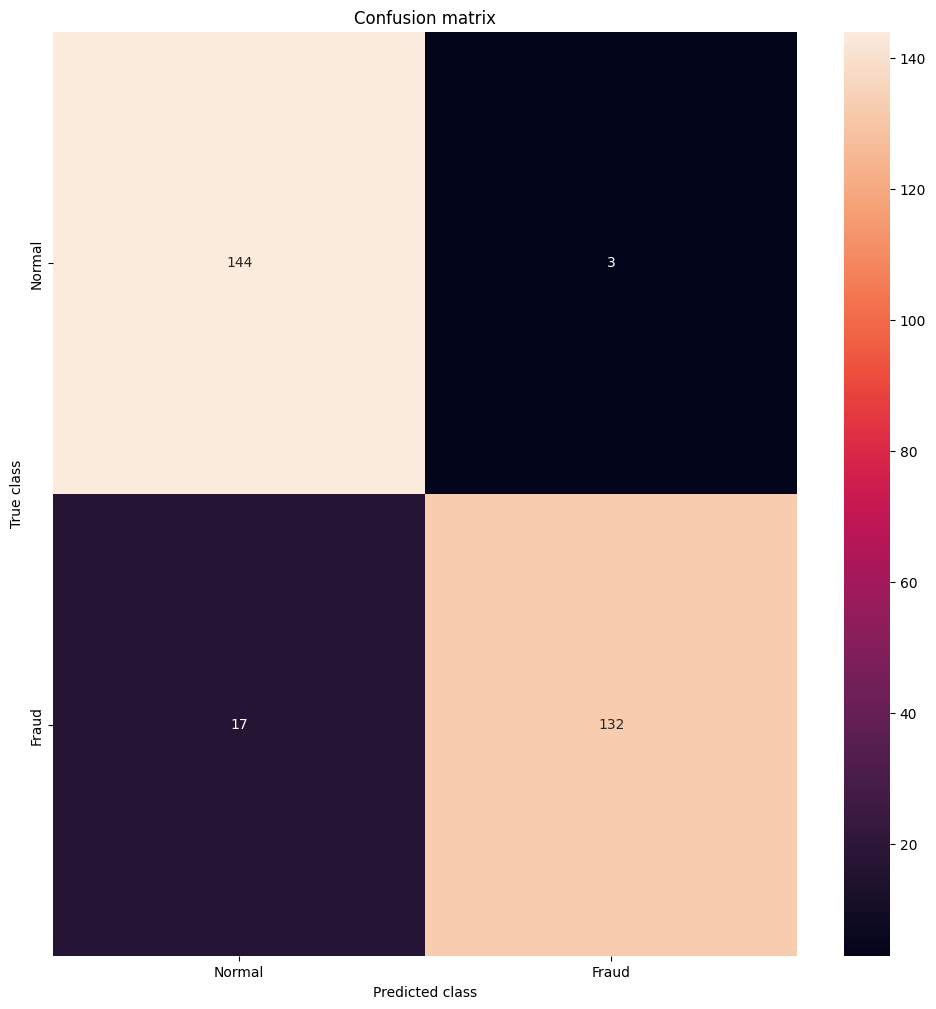

(RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=150,
                        random_state=0),
 {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 0.9324324324324325)

In [34]:
train_random_forest(df_train,'Class')

In [35]:
def train_xgb_classifier(data, target):
    # split the data into X and y
    X = data.drop(target, axis=1)
    y = data[target]

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    
    # # Scaling Data 
    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # Define the XGBClassifier model
    xgb_model = XGBClassifier(random_state=0)

    # Define hyperparameters for tuning
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 1, 2]
    }

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_xgb_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Print the best hyperparameters
    print('Best Hyperparameters:')
    print(best_params)

    # Train the model on the full training set
    best_xgb_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgb)
    precision = precision_score(y_test, y_pred_xgb)
    recall = recall_score(y_test, y_pred_xgb)

    print(f'Accuracy on Test Set: {accuracy:.2f}')
    print(f'Precision on Test Set: {precision:.2f}')
    print(f'Recall on Test Set: {recall:.2f}')
    
    #visulalizing the confusion matrix
    LABELS = ['Normal', 'Fraud'] 
    from sklearn.metrics import confusion_matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb) 
    plt.figure(figsize =(12, 12)) 
    sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
    plt.title("Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()


    return best_xgb_model, best_params

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Accuracy on Test Set: 0.94
Precision on Test Set: 0.98
Recall on Test Set: 0.90


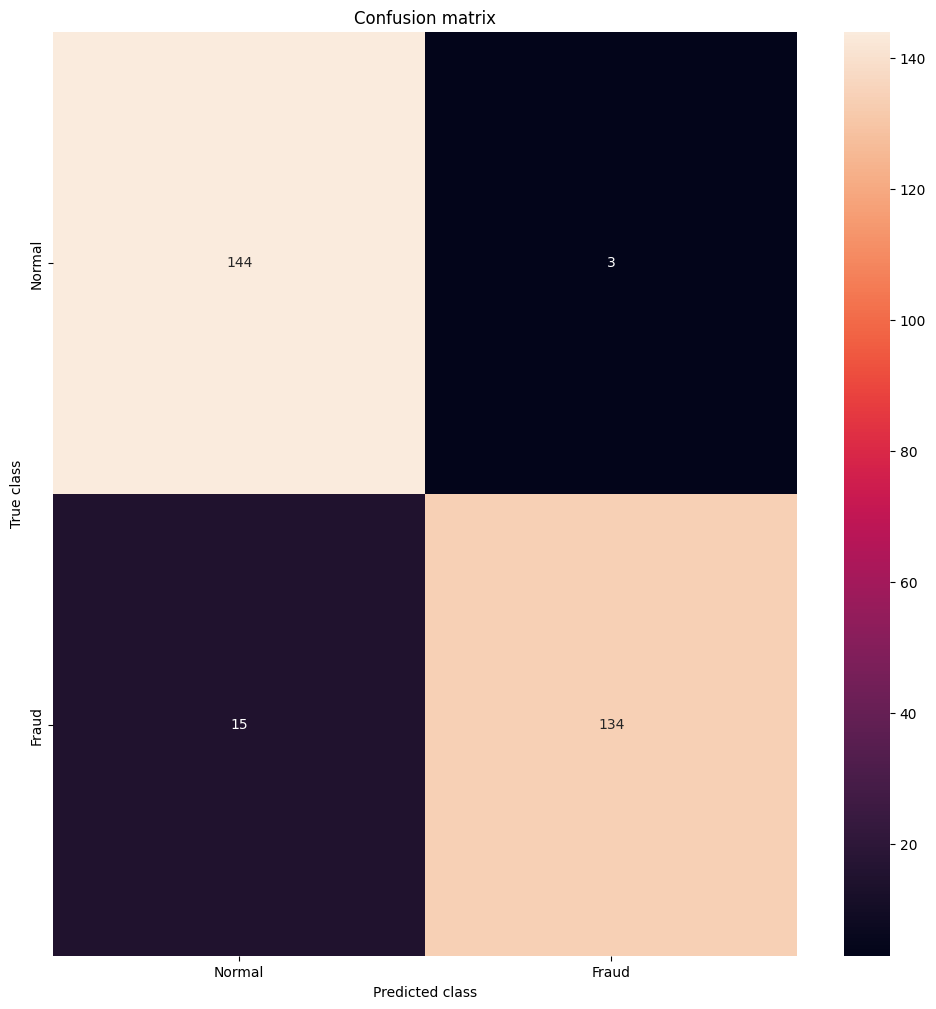

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=2, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=50, n_jobs=None,
               num_parallel_tree=None, random_state=0, ...),
 {'colsample_bytree': 0.8,
  'gamma': 2,
  'learning_rate': 0.2,
  'max_depth': 3,
  'n_estimators': 50,
  'subsample': 1.0})

In [36]:
train_xgb_classifier(df_train,'Class')

In [37]:
# Selcting Best and Highest Accuracy from Above trained Models 
# XGb Model Classifier
# Random Forest
models = ['XGB Classifier', 'RandomForestClassifier']
accuracy_scores = [accuracy, accuracy]

# Find the index of the maximum accuracy
best_accuracy_index = accuracy_scores.index(max(accuracy_scores))

# Print the best model for accuracy
print(f'Best Accuracy: {accuracy_scores[best_accuracy_index]:.2f} with Model: {models[best_accuracy_index]}')

Best Accuracy: 0.93 with Model: XGB Classifier
